In [1]:
import pandas as pd

In [2]:
import numpy as np

In [74]:
import math

In [178]:
import seaborn as sns

In [241]:
data = pd.read_csv('data/website_stat_comparison.csv')
data2 = pd.read_csv('data/website_stat_comparison2.csv')
tdata = data
tdata2 = data2
tdata2 = tdata2.drop(tdata2.index[30]).reset_index()
new_frag = tdata2[list(set(tdata2.columns).difference(set(tdata.columns)))]
tdata = pd.concat([tdata, new_frag], axis=1)
tdata = tdata.drop(tdata.index[19]).reset_index()

In [242]:
# parallel load Critical path
tdata['min_est_cp_ab_par'] = tdata[['css_ab_par','script_ab_par']].apply(lambda x: x[0]+x[1],axis=1)
tdata['min_est_cp_nab_par'] = tdata[['css_nab_par','script_nab_par']].apply(lambda x: x[0]+x[1],axis=1)
# non-parallel load time critical path estimat
tdata['min_est_cp_ab_npar'] = tdata[['css_ab_npar','script_ab_npar']].apply(lambda x: x[0]+x[1],axis=1)
tdata['min_est_cp_nab_npar'] = tdata[['css_nab_npar','script_nab_npar']].apply(lambda x: x[0]+x[1],axis=1)

### Critical Path lower bound
    - Critical path = load time of DOM+CSSOM + eval/bootup 
    - Estimator of lower bound for Critical path = CSSOM fetch time
    

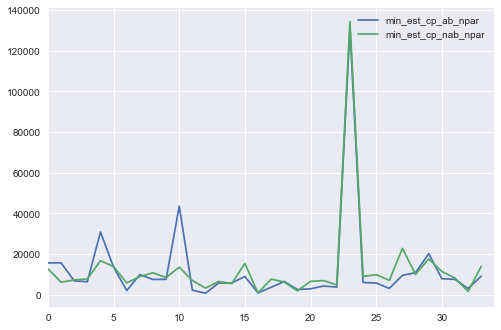

Ratio of times Critical path lower bound time is saved because of adblock: 0.657142857143


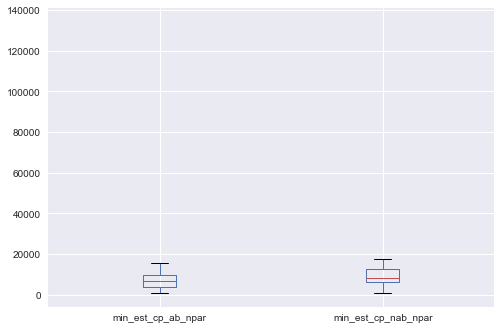

Adblock speeds up Critical path by 16.19169050900413


In [354]:
plt.figure()
tdata[['min_est_cp_ab_npar','min_est_cp_nab_npar']].plot()
plt.show()
print("Ratio of times Critical path lower bound time is saved because of adblock:", 
      sum(tdata['min_est_cp_nab_npar']>tdata['min_est_cp_ab_npar'])*1/len(tdata['min_est_cp_ab_par']))
plt.figure()
tdata[['min_est_cp_ab_npar','min_est_cp_nab_npar']].boxplot()
plt.show()
x = (tdata['min_est_cp_ab_npar'].median() - tdata['min_est_cp_nab_npar'].median())/tdata['min_est_cp_nab_npar'].median()
print("Adblock speeds up Critical path by",abs(x)*100)


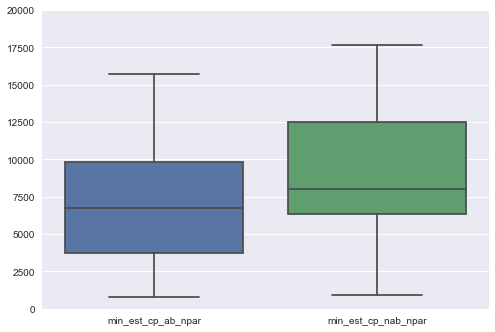

In [356]:
plt.figure()
sns.boxplot(data=tdata[['min_est_cp_ab_npar','min_est_cp_nab_npar']])
plt.ylim(0,20000)
plt.show()

In [357]:
from scipy import stats

In [362]:
stats.ttest_ind(tdata['min_est_cp_ab_npar'][0:-1],tdata['min_est_cp_nab_npar'][0:-1], equal_var = False)

Ttest_indResult(statistic=-0.049895121367485661, pvalue=0.96035677186161095)

In [361]:
tdata['min_est_cp_nab_npar']

0      12833.1
1       6205.3
2       7328.1
3       7819.5
4      16772.0
5      13907.8
6       5832.5
7       8978.9
8      10845.8
9       8502.7
10     13618.4
11      7049.8
12      3330.1
13      6571.3
14      5585.7
15     15440.1
16       929.2
17      7723.5
18      6293.5
19      1967.2
20      6641.6
21      6999.2
22      4897.4
23    134413.6
24      9042.8
25      9920.7
26      7132.0
27     22827.9
28     10074.8
29     17667.1
30     11501.3
31      8258.5
32      1716.9
33     13985.0
34         NaN
Name: min_est_cp_nab_npar, dtype: float64

### Number of objects analysis
-- deep dive of how adblock affects number requests

In [365]:
num_obj_cols = ['nav_ab_num_obj','nav_nab_num_obj',
                'link_ab_num_obj','link_nab_num_obj',
                'script_ab_num_obj','script_nab_num_obj',
               'img_ab_num_obj','img_nab_num_obj',
               'css_ab_num_obj','css_nab_num_obj']

In [366]:
objdata = tdata[num_obj_cols]

In [367]:
objdata['total_obj_ab'] = objdata[['css_ab_num_obj','nav_ab_num_obj',
                                   'link_ab_num_obj','script_ab_num_obj','img_ab_num_obj']].apply(lambda x: x[0]+x[1]+x[2]+x[3]+x[4], axis=1)
objdata['total_obj_nab'] = objdata[['css_nab_num_obj','nav_nab_num_obj',
                                   'link_nab_num_obj','script_nab_num_obj','img_nab_num_obj']].apply(lambda x: x[0]+x[1]+x[2]+x[3]+x[4], axis=1)
objdata['obj_diff'] = objdata[['total_obj_nab','total_obj_ab']].apply(lambda x: x[0] - x[1],axis=1)

C:\Users\ibipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ibipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ibipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [368]:
objdata

,nav_ab_num_obj,nav_nab_num_obj,link_ab_num_obj,link_nab_num_obj,script_ab_num_obj,script_nab_num_obj,img_ab_num_obj,img_nab_num_obj,css_ab_num_obj,css_nab_num_obj,total_obj_ab,total_obj_nab,obj_diff
0,1,1,17,20,36,52,35,50,8,11,97,134,37
1,1,1,8,11,31,30,38,45,6,6,84,93,9
2,1,1,2,5,24,31,42,53,15,15,84,105,21
3,1,1,2,2,19,28,73,96,8,8,103,135,32
4,1,1,1,3,24,37,20,42,45,45,91,128,37
5,1,1,11,12,28,30,48,52,31,32,119,127,8
6,1,1,3,5,10,35,46,79,4,4,64,124,60
7,1,1,3,4,31,36,61,59,3,3,99,103,4
8,1,1,15,19,40,71,29,31,13,13,98,135,37
9,1,1,1,3,12,18,29,38,24,24,67,84,17


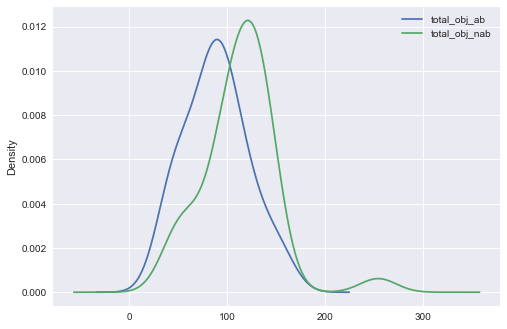

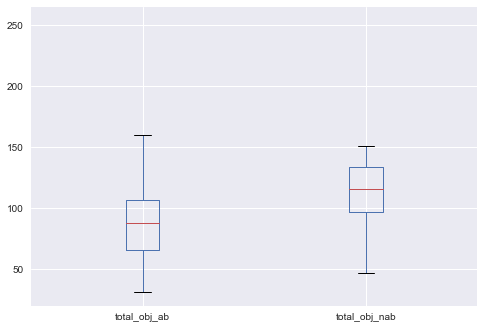

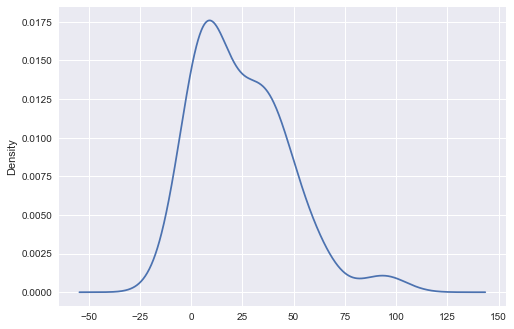

Median number of requests is  24.137931034482758  % lower with adblock


Ttest_indResult(statistic=2.8960849853794937, pvalue=0.0051110293827296019)

In [375]:
plt.figure()
objdata[['total_obj_ab','total_obj_nab']].plot(kind='density')
plt.show()
plt.figure()
objdata[['total_obj_ab','total_obj_nab']].boxplot()
plt.show()
plt.figure()
objdata['obj_diff'].plot(kind='kde')
plt.show()
delta = objdata['total_obj_ab'].median() - objdata['total_obj_nab'].median()
change = delta/objdata['total_obj_nab'].median()
print("Median number of requests is ", abs(change)*100," % lower with adblock")
sum(objdata['total_obj_nab'] > objdata['total_obj_ab'])/len(objdata['total_obj_nab'])
stats.ttest_ind(objdata['total_obj_nab'],objdata['total_obj_ab'], equal_var = False)

In [372]:
objdata['total_obj_ab'].describe()

count     35.000000
mean      88.571429
std       32.246555
min       31.000000
25%       65.500000
50%       88.000000
75%      107.000000
max      160.000000
Name: total_obj_ab, dtype: float64

In [373]:
objdata['total_obj_nab'].describe()

count     35.000000
mean     112.857143
std       37.700946
min       47.000000
25%       97.000000
50%      116.000000
75%      133.500000
max      254.000000
Name: total_obj_nab, dtype: float64

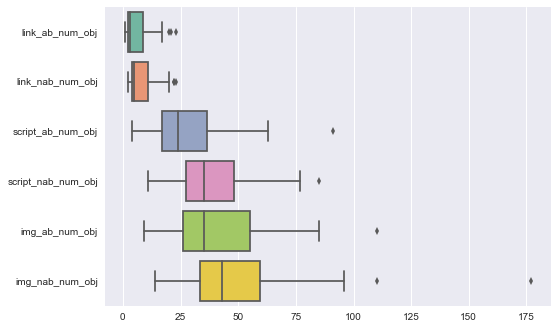

In [249]:
obj_cols = [
                'link_ab_num_obj','link_nab_num_obj',
                'script_ab_num_obj','script_nab_num_obj',
               'img_ab_num_obj','img_nab_num_obj']
plt.figure()
sns.boxplot(data=objdata[obj_cols], orient="h", palette="Set2")
plt.show()

In [250]:
for e in ['link','script','img']:
    delta = objdata[e+'_nab_num_obj'].median() - objdata[e+'_ab_num_obj'].median()
    changep = delta/objdata[e+'_nab_num_obj'].median()
    print('Reduction for objects of type:',e,' is ',changep*100, ' %')

Reduction for objects of type: link  is  40.0  %
Reduction for objects of type: script  is  31.428571428571427  %
Reduction for objects of type: img  is  18.6046511627907  %


### Data related summarization/ Bandwidth save
 -- how much are we possibly saving interms of data

In [326]:
bw_cols =[]
for name in ['link','script','img','nav','css']:
    bw_cols.append(name+'_nab_dec_size')
    bw_cols.append(name+'_ab_dec_size')
bwdata = tdata[bw_cols]

In [327]:
# sum(bwdata['img_nab_dec_size']-bwdata['img_ab_dec_size'])/sum(bwdata['img_nab_dec_size'])

In [328]:
for e in ['img','script']:
    delta = bwdata[e+'_nab_dec_size'].median() - bwdata[e+'_ab_dec_size'].median()
    changep = delta/bwdata[e+'_nab_dec_size'].median()
    print('Reduction for objects of type:',e,' is ',changep)

Reduction for objects of type: img  is  0.007216494845360825
Reduction for objects of type: script  is  0.33204877863052146


In [329]:
# bw_cols =[]
# for name in ['link','script','img','nav','css']:
#     bw_cols.append(name+'_nab_tran_size')
#     bw_cols.append(name+'_ab_tran_size')
# bwdata = tdata[bw_cols]
# for e in ['img','script']:
#     delta = bwdata[e+'_nab_tran_size'].median() - bwdata[e+'_ab_tran_size'].median()
#     changep = delta/bwdata[e+'_nab_tran_size'].median()
#     print('Reduction for objects of type:',e,' is ',changep)

In [330]:
#bwdata['img_save'] = bwdata[['img_nab_tran_size','img_ab_tran_size']].apply(lambda x: (x[0]-x[1])/1000,axis=1)

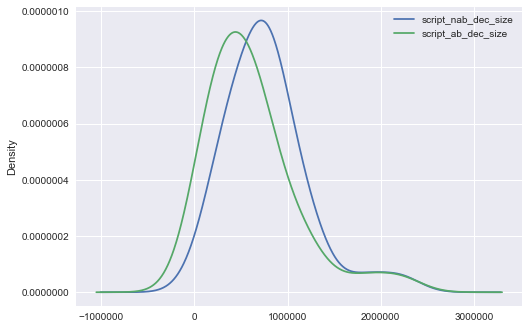

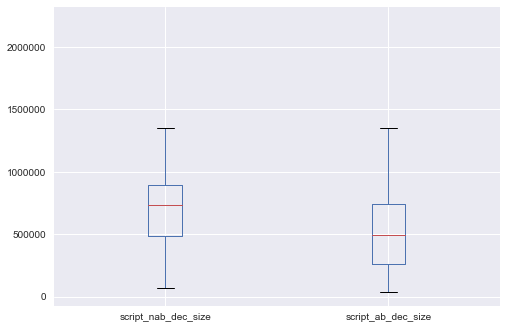

In [333]:
plt.figure()
bwdata[['script_nab_dec_size','script_ab_dec_size']].plot(kind='kde')
plt.show()
plt.figure()
bwdata[['script_nab_dec_size','script_ab_dec_size']].boxplot()
plt.show()

### Server Response Time

In [336]:
sh_obj_cols = [  'css_sh_wait_ab','css_sh_wait_nab',
                'link_sh_wait_ab','link_sh_wait_nab',
                'script_sh_wait_ab','script_sh_wait_nab',
               'img_sh_wait_ab','img_sh_wait_nab']
objdata=tdata[sh_obj_cols]

In [340]:
for e in ['script','img']:
    delta = objdata[e+'_sh_wait_nab'].median() - objdata[e+'_sh_wait_ab'].median()
    changep = delta/objdata[e+'_sh_wait_nab'].median()
    print('Reduction for objects of type:',e,' is ',changep*100, ' %')

Reduction for objects of type: script  is  45.73030842016409  %
Reduction for objects of type: img  is  26.454293607285994  %


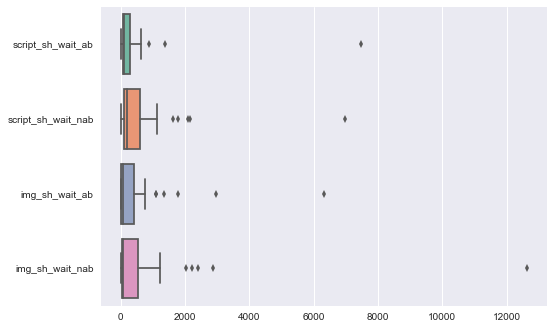

In [351]:
plt.figure()
sns.boxplot(data=objdata[['script_sh_wait_ab','script_sh_wait_nab',
               'img_sh_wait_ab','img_sh_wait_nab']], orient="h", palette="Set2")
plt.show()

In [343]:
objdata['total_sh_ab'] = objdata[['css_sh_wait_ab','link_sh_wait_ab',
                                  'script_sh_wait_ab','img_sh_wait_ab']].apply(lambda x: x[0]+x[1]+x[2]+x[3],axis=1)
objdata['total_sh_nab'] = objdata[['css_sh_wait_nab','link_sh_wait_nab',
                                  'script_sh_wait_nab','img_sh_wait_nab']].apply(lambda x: x[0]+x[1]+x[2]+x[3],axis=1)

C:\Users\ibipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ibipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


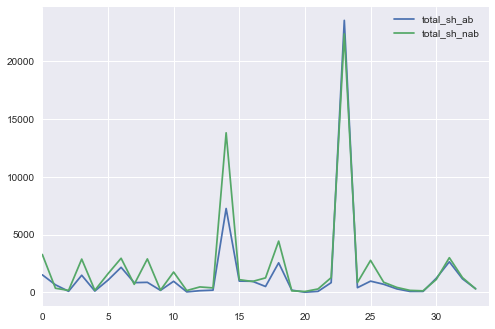

In [346]:
plt.figure()
objdata[['total_sh_ab','total_sh_nab']].plot()
plt.show()

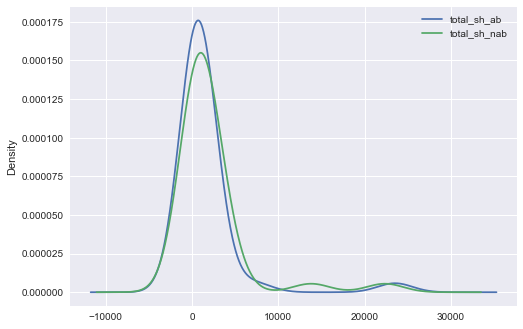

In [350]:
plt.figure()
objdata[['total_sh_ab','total_sh_nab']].plot(kind='density')
plt.show()

In [347]:
(objdata['total_sh_nab'].median() - objdata['total_sh_ab'].median())/objdata['total_sh_nab'].median()

0.15385470513386004

In [273]:
tdata.columns

Index(['level_0', 'css_sh_wait_nab', 'script_sh_wait_nab', 'link_sh_wait_nab',
       'link_nab_npar', 'script_nab_par', 'script_nab_npar', 'css_ab_par',
       'css_ab_npar', 'css_nab_npar', 'link_ab_par', 'link_sh_wait_ab',
       'css_nab_par', 'script_sh_wait_ab', 'script_ab_npar', 'img_sh_wait_nab',
       'css_sh_wait_ab', 'name', 'link_nab_par', 'img_nab_par', 'img_ab_par',
       'img_sh_wait_ab', 'script_ab_par', 'img_ab_npar', 'img_nab_npar',
       'link_ab_npar', 'css_nab_sh_wait', 'script_ab_dec_size',
       'img_nab_num_obj', 'script_ab_num_obj', 'css_ab_tran_size',
       'nav_ab_par', 'nav_ab_sh_wait', 'nav_nab_tran_size',
       'link_nab_tran_size', 'link_ab_tran_size', 'nav_nab_num_obj',
       'script_nab_tran_size', 'nav_ab_tran_size', 'img_ab_dec_size',
       'script_ab_enc_size', 'nav_nab_dec_size', 'img_ab_num_obj',
       'nav_nab_par', 'css_ab_dec_size', 'img_ab_sh_wait', 'img_nab_sh_wait',
       'link_ab_sh_wait', 'nav_nab_enc_size', 'script_ab_sh_wait',
 

In [56]:
tdata['min_est_cp_ab_npar'].describe()

count        35.000000
mean      12663.457143
std       22335.863852
min         806.000000
25%        3773.800000
50%        6878.600000
75%       10401.150000
max      131003.200000
Name: min_est_cp_ab_npar, dtype: float64

In [ ]:
plt.figure()
tdata[['min_est_cp_ab_par','min_est_cp_nab_par']].plot()
plt.show()

In [43]:
import matplotlib.pyplot as plt

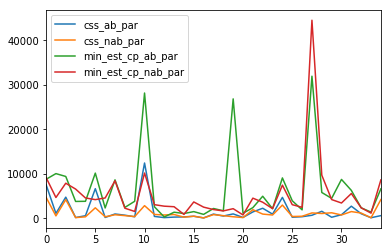

In [44]:
plt.figure()
tdata[['css_ab_par','css_nab_par','min_est_cp_ab_par','min_est_cp_nab_par']].plot()
plt.show()

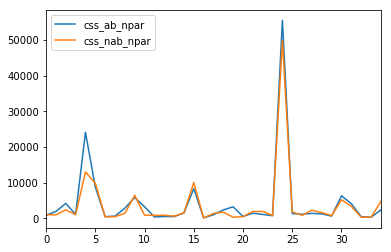

In [17]:

plt.figure()
data[['css_ab_npar','css_nab_npar']].plot()
plt.show()

In [ ]:
tdata['css_nab_npa']

In [51]:
sum(tdata['css_nab_par']>tdata['css_ab_par'])*1/len(tdata['css_ab_par'])

0.42857142857142855

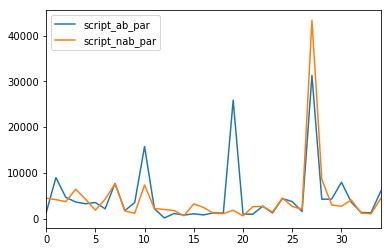

In [37]:
plt.figure()
tdata[['script_ab_par','script_nab_par']].plot()
plt.show()

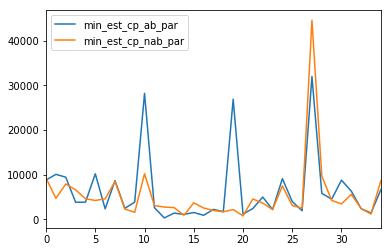

0.45714285714285713

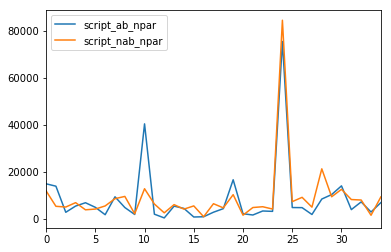

In [19]:
plt.figure()
data[['script_ab_npar','script_nab_npar']].plot()
plt.show()

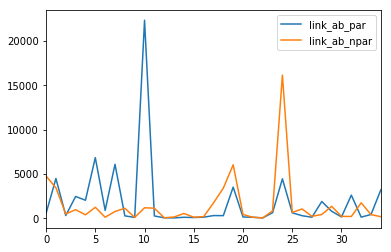

In [21]:
plt.figure()
data[['link_ab_par','link_ab_npar']].plot()
plt.show()

In [46]:
tdata.describe()

,css_sh_wait_nab,script_sh_wait_nab,link_sh_wait_nab,link_nab_npar,script_nab_par,script_nab_npar,css_ab_par,css_ab_npar,css_nab_npar,link_ab_par,...,img_ab_par,img_sh_wait_ab,script_ab_par,img_ab_npar,img_nab_npar,link_ab_npar,min_est_cp_ab_par,min_est_cp_nab_par,min_est_cp_ab_npar,min_est_cp_nab_npar
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000
mean,329.382857,624.371429,405.925714,1441.125714,4223.522857,8878.120000,1632.114286,4325.580000,3782.56000,1919.071429,...,12658.122857,525.231429,4733.291429,12586.408571,13064.417143,1495.70000,6365.405714,5390.134286,12663.457143,12660.680000
std,1114.628215,1253.778642,1017.185264,2699.789261,7099.438646,13739.614349,2620.602009,9905.808848,8587.96666,3987.563167,...,14434.072491,1189.924344,6729.232086,11779.118921,12841.708580,2890.38165,7660.951783,7316.386943,22335.863852,21699.476183
min,0.000000,9.800000,0.000000,113.800000,584.800000,787.400000,73.400000,142.800000,141.80000,53.800000,...,762.100000,0.000000,140.800000,232.800000,2207.100000,53.80000,280.100000,739.900000,806.000000,929.200000
25%,17.800000,93.300000,26.450000,260.100000,1712.800000,4305.000000,279.550000,656.500000,817.00000,138.950000,...,1477.250000,0.000000,1213.050000,3306.100000,5197.350000,205.40000,2019.950000,2307.900000,3773.800000,6432.400000
50%,48.500000,194.100000,69.600000,741.200000,2658.900000,5934.900000,668.800000,1365.900000,1394.50000,322.100000,...,5231.000000,67.600000,2701.900000,7617.200000,7587.600000,554.00000,3814.100000,3606.600000,6878.600000,8258.500000
75%,236.100000,578.900000,409.450000,1451.000000,4241.800000,9135.450000,1256.750000,3271.000000,2343.90000,2256.850000,...,19203.950000,451.750000,4313.950000,18527.200000,17022.300000,1223.65000,8687.200000,6061.100000,10401.150000,12167.200000
max,6615.600000,6979.900000,5905.500000,15676.100000,43359.300000,84478.000000,12428.800000,55569.100000,49935.60000,22326.200000,...,56219.900000,6310.700000,31294.100000,51321.300000,61777.300000,16141.30000,31962.900000,44553.800000,131003.200000,134413.600000
